<a href="https://colab.research.google.com/github/denverkim/DATA_MINING/blob/main/LAB8_CLASS_FRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 훈련데이터 생성
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }
train = pd.DataFrame(candidates)
train

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0
5,730,3.7,6,1
6,690,2.3,1,0
7,720,3.3,4,1
8,740,3.3,5,1
9,690,1.7,1,0


# 기본사항 체크

In [4]:
# 데이터 사이즈
train.shape

(40, 4)

In [5]:
# 데이터 타입
train.dtypes

,0
gmat,int64
gpa,float64
work_experience,int64
admitted,int64


In [6]:
# 널값 체크
train.isna().sum()

,0
gmat,0
gpa,0
work_experience,0
admitted,0


In [7]:
# 기본 통계량
train.describe()

,gmat,gpa,work_experience,admitted
count,40.000000,40.000000,40.000000,40.000000
mean,654.000000,3.095000,3.425000,0.475000
std,61.427464,0.631218,1.737778,0.505736
min,540.000000,1.700000,1.000000,0.000000
25%,607.500000,2.700000,2.000000,0.000000
50%,660.000000,3.300000,4.000000,0.000000
75%,690.000000,3.700000,5.000000,1.000000
max,780.000000,4.000000,6.000000,1.000000


# 사전 데이터 분석

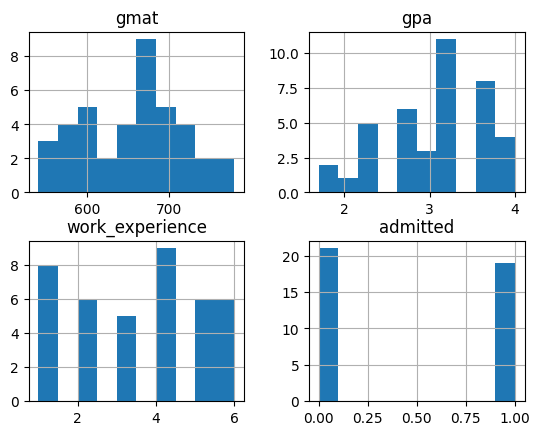

In [15]:
# 단변량 분석 - 히스토그램
train.hist()
plt.show()

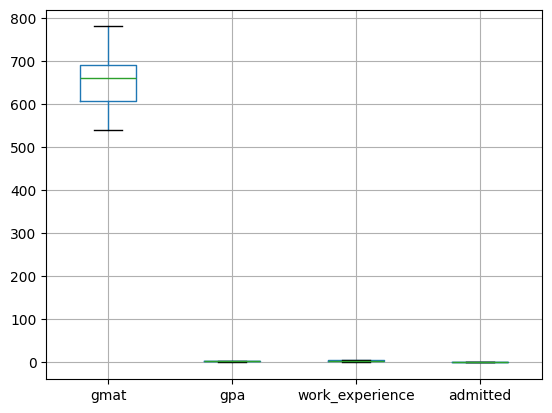

In [17]:
# 단변량 분석 - 박스플랏
train.boxplot() # 스케일링 필요
plt.show()

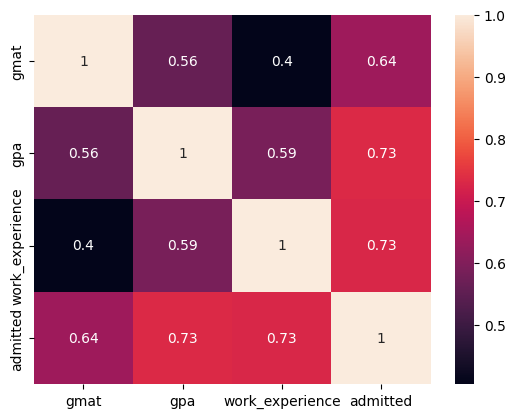

In [11]:
# 다변량 분석 - 상관관계
sns.heatmap(train.corr(), annot=True)
plt.show()

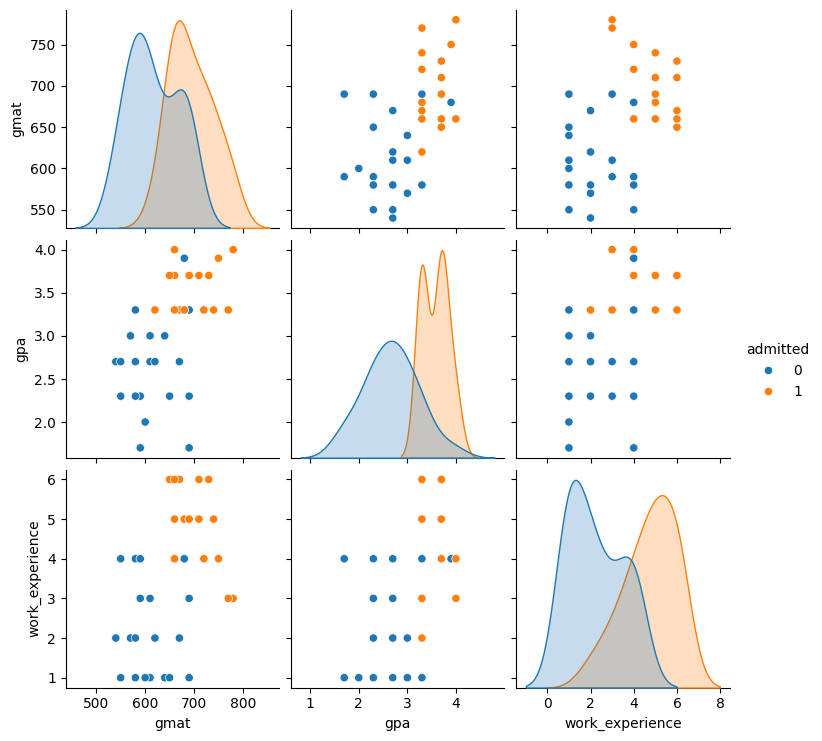

In [12]:
# 산점도
sns.pairplot(train, hue='admitted')
plt.show()

In [18]:
# x and y split
y = train.admitted
x = train.drop('admitted', axis=1)

# 분류모델

In [19]:
# 로지스틱 회귀분석
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x, y)

LogisticRegression()

In [21]:
# 기울기와 Y절편
print('기울기: ', model.coef_)
print('Y 절편: ', model.intercept_)

기울기:  [[0.02324794 0.77285359 0.99548198]]
Y 절편:  [-21.48179062]


# 모델 평가

In [22]:
# 모델 평가
model.score(x, y)

0.9

In [25]:
# 모델 평가
from sklearn.metrics import accuracy_score
accuracy_score(y, model.predict(x))

0.9

In [23]:
# 교차검증
from sklearn.model_selection import cross_val_score
print(cross_val_score(model, x, y, cv=5))

[0.75  0.875 0.875 1.    1.   ]


In [26]:
# 분류보고서
from sklearn.metrics import classification_report
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.86      0.95      0.90        19

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40



[[18  3]
 [ 1 18]]


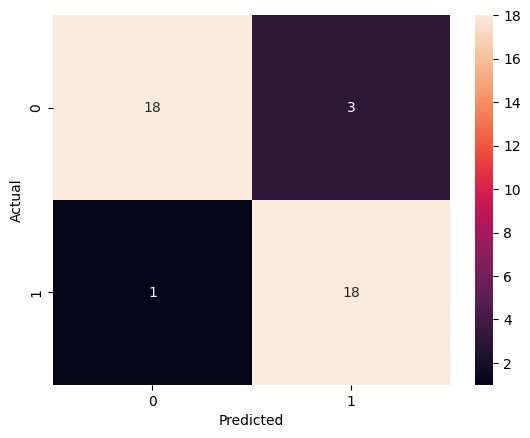

In [30]:
# 혼동행렬
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, model.predict(x)))
sns.heatmap(confusion_matrix(y, model.predict(x)), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [34]:
# 락커브
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, x, y)
plt.show()

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)

# 예측

In [35]:
# 테스트 데이터 생성
gmat = [590, 740, 680, 610, 710]
gpa = [2, 3.7, 3.3, 2.3, 3]
work_experience = [3, 4, 6, 1, 5]
x_test = pd.DataFrame({
    'gmat': gmat,
    'gpa': gpa,
    'work_experience': work_experience})
y_test = [0, 1, 1, 0, 1]

In [36]:
x_test

,gmat,gpa,work_experience
0,590,2.0,3
1,740,3.7,4
2,680,3.3,6
3,610,2.3,1
4,710,3.0,5


In [37]:
# 테스트 데이터로 예측
model.predict(x_test)

array([0, 1, 1, 0, 1])

In [39]:
# 통계패키지를 이용한 로지스틱 회귀분석
from statsmodels.api import Logit
import statsmodels.api as sm

logit_model = Logit(y, sm.add_constant(x))
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.214131
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               admitted   No. Observations:                   40
Model:                          Logit   Df Residuals:                       36
Method:                           MLE   Df Model:                            3
Date:                Fri, 08 Nov 2024   Pseudo R-squ.:                  0.6905
Time:                        02:02:34   Log-Likelihood:                -8.5652
converged:                       True   LL-Null:                       -27.676
Covariance Type:            nonrobust   LLR p-value:                 2.537e-08
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -22.0233      9.086     -2.424      0.015     -39.831      -4.216
gmat                0.0157      0.015      1.078      0.281      -0.013       0.044
gpa                 2.4545      2.008      1.222      0.222      -1.481       6.390
work_experience     1.0027      0.573      1.749      0.080      -0.121       2.127
===================================================================================
"""